In [ ]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#### Read the data and convert it as a dataframe

In [ ]:
fetch_california_housing()
dataset = fetch_california_housing()

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_target = pd.DataFrame(dataset.target, columns=["target"])
df = pd.concat([df, df_target], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(dataset.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


### Split the data into Train, Test


In [ ]:
X, y = df.drop('target', axis=1), df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')


X_train: (13828, 8)
y_train: (13828,)
X_test: (6812, 8)
y_test: (6812,)


### Build the Neural Network

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', use_bias=True, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(6, activation='relu', use_bias=True),
    tf.keras.layers.Dense(4, activation='relu', use_bias=True),
    tf.keras.layers.Dense(1, activation='linear')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compile the model

Epoch 1/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 5.4755 - mae: 1.0103 - val_loss: 1.7855 - val_mae: 0.8994
Epoch 2/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.8453 - mae: 0.9287 - val_loss: 1.5207 - val_mae: 0.8653
Epoch 3/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.5240 - mae: 0.8845 - val_loss: 1.3571 - val_mae: 0.8403
Epoch 4/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.9238 - mae: 0.8523 - val_loss: 1.2602 - val_mae: 0.8311
Epoch 5/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.5094 - mae: 0.8184 - val_loss: 1.1543 - val_mae: 0.7854
Epoch 6/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.2735 - mae: 0.7879 - val_loss: 1.0881 - val_mae: 0.7667
Epoch 7/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.4905 - mae: 0.8075 - val_loss: 1.0604 - val_mae: 0.7462
Epoch 8/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.1954 - mae: 0.7695 - val_loss: 0.9991 - val_mae: 0.7509
Epoch 9/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - lo

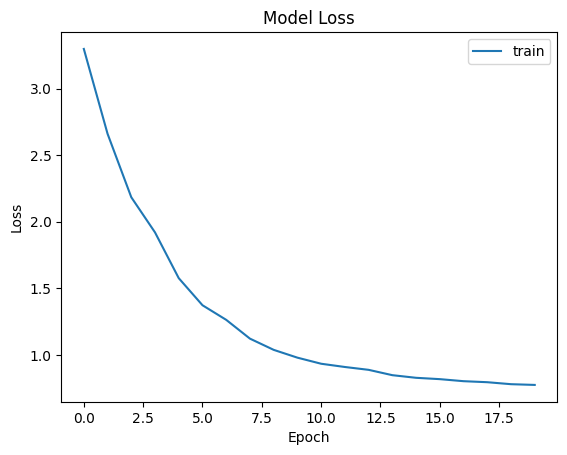

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00007)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

#Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


# Access the training loss from the history object
train_losses = history.history['loss']

# Plot the losses
plt.plot(train_losses, label='train')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

## Same network implementaion using PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


prepare the data

In [ ]:
X_train_tensor = torch.FloatTensor(X_train.to_numpy())
y_train_tensor = torch.FloatTensor(y_train.to_numpy()).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test.to_numpy())
y_test_tensor = torch.FloatTensor(y_test.to_numpy()).reshape(-1, 1)

Epoch: 0, Loss: 11.4608
Epoch: 1, Loss: 11.3981
Epoch: 2, Loss: 11.3357
Epoch: 3, Loss: 11.2736
Epoch: 4, Loss: 11.2117
Epoch: 5, Loss: 11.1501
Epoch: 6, Loss: 11.0888
Epoch: 7, Loss: 11.0277
Epoch: 8, Loss: 10.9670
Epoch: 9, Loss: 10.9065
Epoch: 10, Loss: 10.8462
Epoch: 11, Loss: 10.7863
Epoch: 12, Loss: 10.7267
Epoch: 13, Loss: 10.6673
Epoch: 14, Loss: 10.6082
Epoch: 15, Loss: 10.5495
Epoch: 16, Loss: 10.4910
Epoch: 17, Loss: 10.4329
Epoch: 18, Loss: 10.3750
Epoch: 19, Loss: 10.3174
20


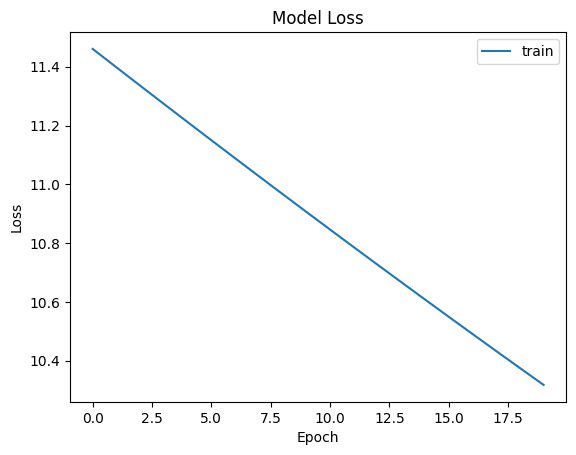

In [ ]:
class PyTorchModel(nn.Module):
    def __init__(self, input_dim):
      super(PyTorchModel, self).__init__()
      self.network = nn.Sequential(
          nn.Linear(input_dim, 8), #input layer
          nn.ReLU(), #activiation function
          nn.Linear(8, 6), #hidden layer
          nn.ReLU(), #actv
          nn.Linear(6, 4), #hidden layer
          nn.ReLU(), #actv
          nn.Linear(4, 1) #output layer
      )

    def forward(self, x):
      return self.network(x)


model = PyTorchModel(input_dim=X_train.shape[1])

# loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00007)
# Reset training loss history
if 'train_losses' in globals():
    del train_losses
train_losses = []
#Train
epochs = 20
for epoch in range(epochs):
    model.train()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    train_losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch: {epoch}, Loss: {loss.item():.4f}')

print(len(train_losses))#For dubgging how many times the loop ran

# Plot the losses safely
plt.plot(range(len(train_losses)), train_losses, label='train')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Report
First we get the data set from

    from sklearn.datasets import fetch_california_housing
then we make it a dataframe then concat the target as the last column

    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df_target = pd.DataFrame(dataset.target, columns=["target"])
    df = pd.concat([df, df_target], axis=1)
    df.head()

Then we split the data into Train, Test

    X, y = df.drop('target', axis=1), df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Then we build the Neural Network by using tf.keras.Sequential and make every layer.

relu is the activiation function used in the hidden layers and a linear activation function is used in output layer.
I changed the the first hidden layer to 6 neurons and the second hidden layer to 4 neurons to better optimize the problem.

    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', use_bias=True, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(6, activation='relu', use_bias=True),
    tf.keras.layers.Dense(4, activation='relu', use_bias=True),
    tf.keras.layers.Dense(1, activation='linear')])


Them we compile the model using 'adam' as an optimizer , and mse as the loss function  the learning rate is 0.00007 because after many iterations this is the hyperparmeter that workoud the best for this pro blem

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00007)

    model.compile(optimizer=optimizer, loss='mse', metrics=['mae']
Then we train the model and observe the loss changes

# PyTorch model
First we transfor the data to pytorch tensors
Note : tensors cannot take dataframes so i converted the data to numpy arrays.

    X_train_tensor = torch.FloatTensor(X_train.to_numpy())
    y_train_tensor = torch.FloatTensor(y_train.to_numpy()).reshape(-1, 1)
    X_test_tensor = torch.FloatTensor(X_test.to_numpy())
    y_test_tensor = torch.FloatTensor(y_test.to_numpy()).reshape(-1, 1)


Then we define a class with the name PyTorchModel with the parameters nn abd module then in the constructor we define the structure of the neural network

    class PyTorchModel(nn.Module):
    def __init__(self, input_dim):
      super(PyTorchModel, self).__init__()
      self.network = nn.Sequential(
          nn.Linear(input_dim, 8), #input layer
          nn.ReLU(), #activiation function
          nn.Linear(8, 6), #hidden layer
          nn.ReLU(), #actv
          nn.Linear(6, 4), #hidden layer
          nn.ReLU(), #actv
          nn.Linear(4, 1) #output layer
      )

 Then we define the model object

    model = PyTorchModel(input_dim=X_train.shape[1])
Then the loss function and optimizer

    critierion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.00007)

Then the training loop and plotting the loss

    #Train
    epochs = 20
    for epoch in range(epochs):
      model.train()

      outputs = model(X_train_tensor)
      loss = critierion(outputs, y_train_tensor)
      train_losses.append(loss.item())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # if epoch % 5 == 0:
      print(f'Epoch: {epoch}, Loss: {loss.item():.4f}')

    #plot the losses
    plt.plot(train_losses, label='train')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

  


